# Laboratório 4: Simulação, Amostragem e Teste de Hipóteses

Bem-vindo ao Laboratório 4! Isso cobre os tópicos listados abaixo. Clique nos links para ler sobre esses tópicos no livro.

- Simulação (ver [CIT 9.3](https://inferentialthinking.com/chapters/09/3/Simulation.html))
- Amostragem (ver [CIT 10](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html))
- Teste de hipóteses (ver [CIT 11](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html))

Você deve concluir todo este laboratório e enviá-lo ao Moodle até às 23h59 da data de vencimento.

In [330]:
# Descomente para executar no Colab
! pip install babypandas --quiet

In [331]:
import numpy as np
import babypandas as bpd
import math

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## 1. Masmorras e Dragões 🐉

No RPG de fantasia Dungeons & Dragons, cada jogador assume o papel de um determinado personagem.

Para realizar uma ação, o jogador lança um dado de 20 lados, adiciona um número "modificador" ao lançamento e compara o total com um limite de sucesso.  O valor do modificador depende da competência do personagem do jogador em realizar a ação.

Ao longo desta questão, trabalharemos com o seguinte exemplo concreto. Suponha que o personagem de Alice, um guerreiro bárbaro chamado Roga, esteja tentando derrubar uma porta pesada.  Alice lança um dado de 20 faces, adiciona um modificador de 11 ao resultado (porque seu personagem é bom em derrubar portas) e consegue derrubar a porta se o total for pelo menos 16.

**Pergunta 1.1.** Escreva um código que simule este procedimento.  Calcule três valores:
- o resultado do lançamento do dado de 20 lados de Alice (`roll_result`),
- o resultado de sua rolagem mais o modificador de 11 de Roga (`modified_result`), e
- um valor booleano que indica se a ação foi bem-sucedida (`action_succeeded`).

**Não preencha nenhum dos resultados manualmente**; toda a simulação deve acontecer em código.

_Dica:_ O lançamento de um dado de 20 faces é um número escolhido uniformemente na matriz `np.array([1, 2, 3, 4, ..., 20])`. Você pode armazenar essas possibilidades em `possible_rolls`. Portanto, um lançamento de um dado de 20 faces *mais 11* é um número escolhido uniformemente dessa matriz, mais 11.

In [332]:
possible_rolls = range(1, 20)
roll_result = np.random.choice(possible_rolls)
modified_result = roll_result + 11
action_succeeded = modified_result >= 16

# A próxima lista apenas printa os resultados de uma maneira mais legível.
# Uma vez terminado, você pode deletar, caso queira.

print("Em uma rolagem com modificação {:d}, ação de Alice {}.".format(modified_result, "teve sucesso" if action_succeeded else "falhou"))

Em uma rolagem com modificação 27, ação de Alice teve sucesso.


**Questão 1.2.** Vamos repetir a simulação acima 7 vezes. Abaixo, atribua `seven_reps` a um array de booleanos, onde cada elemento corresponde ao sucesso de uma única simulação. Em seguida, determine a fração dessas simulações que tiveram sucesso e atribua sua resposta a `rough_success_chance`.

_**Nota:**_ **Não** use um loop `for` aqui! Em vez disso, chame `np.random.choice` com vários argumentos (o segundo deles é o número de vezes que você deseja lançar o dado). O resultado será uma matriz. Lembre-se de que, por exemplo, `arr + 1` adiciona o número 1 a cada elemento do array `arr`.

In [333]:
seven_reps = (np.random.choice(possible_rolls, 7, True) + 11) > 16
rough_success_chance = np.count_nonzero(seven_reps) / seven_reps.size
rough_success_chance

0.5714285714285714

**Pergunta 1.3.** Qual é a probabilidade teórica de Roga derrubar a porta com sucesso ao lançar um dado de 20 faces com um modificador de 11 e limite de sucesso de 16? Esta é uma questão de matemática, não de programação.

In [334]:
theoretical_probability = 0.8

**Pergunta 1.4.** Vamos tentar colocar parte do seu trabalho da versão 1.2 em uma função. Abaixo, escreva uma função Python chamada `simulate_observations`.  Não deve receber argumentos e deve retornar uma matriz de 7 números.  Cada um dos números deve ser o lançamento modificado de uma simulação.  **Então**, chame sua função uma vez para calcular uma matriz de 7 rolagem modificadas simuladas.  Nomeie essa matriz como `observations`.

Novamente, como em 1.2, não deve haver necessidade de usar um loop `for`.

In [335]:
modifier = 11 # Não mude isso.
num_observations = 10000 # Não mude isso.

def simulate_observations():
    """Produz um array de 7 rolagens modificadas"""
    return (np.random.choice(possible_rolls, num_observations, True) + modifier)

observations = simulate_observations()
observations

array([24, 30, 27, ..., 14, 17, 16])

Agora, vamos fingir que **não sabemos** que Roga tem um modificador de 11 para esta ação. Em vez disso, observamos o lançamento modificado (isto é, o lançamento do dado mais o modificador de 11) de cada uma das 7 tentativas dela de derrubar portas. Gostaríamos de **estimar** seu modificador usando apenas os 7 números do array `observations` e nada mais.

Uma maneira simples de fazer isso envolve observar o menor rolo modificado geral. Lembre-se de que o menor número em um dado de 20 lados é 1 e o menor modificador possível é 0.
- Se observarmos que o menor lançamento modificado foi 1, sabemos que o modificador do personagem deve ser 0.
- Se observarmos que o menor resultado modificado é algo maior que 1 - digamos, 13 - não podemos dizer com certeza qual é o modificador do personagem. Neste caso, **vamos adivinhar que em algum momento o jogador tirou 1** e que o modificador de seu personagem é **13 - 1 = 12**.
- Isso funciona porque, se virmos jogadas modificadas o suficiente, uma delas terá ocorrido quando o jogador tirou 1.

**Pergunta 1.5.** Usando este método, estime o `modifier` de `observations` e nomeie essa estimativa como `min_based_estimate`. Se você não tiver certeza do que fazer, leia novamente o parágrafo anterior com atenção.

In [336]:
min_based_estimate = observations.min() - 1
min_based_estimate

11

Outra forma de estimar o modificador envolve a média das `observações`.
- Se o modificador de um personagem for zero, então a média de um grande número de suas jogadas modificadas será próxima da média de 1, 2, ..., 20, que é 10,5.
- Se o modificador deles for $m$, então a média de seus lançamentos modificados será próxima da média de $1 + m$, $2 + m$, ..., $20 + m$,
que é 10,5 + $m$.
- Como podemos calcular a média dos lançamentos modificados, podemos usar isso para estimar $m$.

**Pergunta 1.6.** Escreva uma função chamada `calculate_mean_based_estimate` que calcule uma estimativa do modificador usando este método.  Ele deve receber uma matriz de rolagens modificadas (como a matriz `observations`) como argumento e retornar uma estimativa de `modifier` com base na média desses números.

**_Nota:_** Tudo bem se sua `mean_based_estimate` não for um número inteiro!

In [337]:
def calculate_mean_based_estimate(nums):
    """Estimate the roll modifier based on observed modified rolls in the array nums."""
    return nums.mean() - 10.5

# Aqui está uma chamada de exemplo para sua função.
# Ela computa uma estimativa do modificador (modifier) das 7 observações.

mean_based_estimate = calculate_mean_based_estimate(observations)
mean_based_estimate

10.4683

Lembre-se, o modificador real foi 11. Qual foi a melhor estimativa, a `min_based_estimate` ou a `mean_based_estimate`? Execute a célula abaixo para comparar as diferentes estimativas com o modificador real.

In [338]:
print("Modificador real:", modifier)
print("Estimativa baseado no mínimo:", min_based_estimate)
print("Estimativa baseado na média:", mean_based_estimate)

Modificador real: 11
Estimativa baseado no mínimo: 11
Estimativa baseado na média: 10.4683


Qual estratégia de estimativa você acha que é melhor em geral? A melhor estratégia de estimativa muda à medida que o número de observações aumenta? O valor do modificador real é importante? Sinta-se à vontade para explorar essas questões ou responder a algumas de sua preferência!

## 2. Toque Terapêutico 👆

O Toque Terapêutico (TT) é uma terapia energética que os profissionais afirmam poder promover saúde e relaxamento. Os profissionais colocam as mãos perto do paciente e dizem que são capazes de detectar e manipular o chamado Campo de Energia Humana (HEF, Human Energy Field) do paciente.
O TT foi popular ao longo do século 20 e foi apontado como uma ótima maneira de trazer equilíbrio à saúde de uma pessoa.

### Experiência de Emily Rosa

Emily Rosa era uma aluna da 4ª série que teve ampla exposição ao mundo do TT devido aos seus pais, que eram médicos e céticos em relação à ideia do TT. Para seu projeto de feira de ciências da 4ª série, Emily decidiu testar se os profissionais de TT poderiam realmente interagir com o HEF de uma pessoa.

A experiência de Emily foi limpa, simples e eficaz. Devido às ocupações de seus pais na área médica, ela tinha amplo acesso a pessoas que afirmavam ser praticantes de TT.

Emily usou 21 praticantes de TT para seu experimento. Ela se separava do praticante com uma prancha, para que eles não pudessem vê-la, e pedia-lhes que colocassem ambas as mãos através de uma abertura na prancha. Emily jogaria uma moeda. Dependendo de como a moeda caía, ela colocava as mãos acima da mão esquerda ou direita do praticante. O praticante de TT teria então que detectar o HEF de Emily e especificar se Emily estava pairando sobre sua mão esquerda ou direita. No geral, em 210 amostras, o praticante escolheu a mão correta em 44% das vezes.

O principal objetivo de Emily aqui era testar se as suposições dos praticantes de TT eram ou não aleatórias, como o lançamento de uma moeda. Na maioria dos experimentos médicos, esta é a norma. Queremos testar se algum tratamento tem ou não efeito. Isto *não* é o mesmo que testar se o tratamento realmente funciona como pretendido.

Começaremos agora a formular o experimento de Emily em termos da terminologia que aprendemos neste curso, particularmente na Aula 15.

<!-- COMEÇAR PERGUNTA -->

**Pergunta 2.1.** Quais são as hipóteses nula e alternativa para o experimento de Emily? Escreva ambas as suas respostas na célula abaixo.

<!--
COMEÇAR PERGUNTA
nome: q2_1
manual: verdadeiro
-->

<!-- FIM DA PERGUNTA -->



**Pergunta 2.2.** Lembre-se de que o praticante acertou 44% (ou seja, 0,44) das vezes. De acordo com a hipótese nula, em média, que proporção de vezes esperamos que o praticante adivinhe a mão correta? Certifique-se de que sua resposta esteja entre 0 e 1.

In [339]:
expected_correct = 0.5
expected_correct

0.5

O objetivo agora é ver se o nosso desvio em relação a esta proporção esperada de respostas corretas se deve a algo diferente do acaso.

**Pergunta 2.3.** Qual das alternativas a seguir é a melhor estatística para testar este modelo? Atribua `best_ts` a 1, 2 ou 3.

1. A diferença entre a proporção esperada de respostas corretas e a proporção real de respostas corretas.
2. A diferença absoluta entre a proporção esperada de respostas corretas e a proporção real de respostas corretas.
3. A soma da proporção esperada de respostas corretas e a proporção real de respostas corretas.

In [340]:
best_ts = 1
best_ts

1

_**Observação:**_ Se você inicialmente respondeu 2.3 incorretamente, sugerimos revisar o final da Aula 14.

**Questão 2.4.** Defina a função `test_statistic` que recebe uma proporção esperada e uma proporção real, e retorna o valor da estatística de teste escolhida acima (como uma proporção entre 0 e 1). Suponha que suas entradas sejam proporções entre 0 e 1.

In [341]:
def test_statistic(expected_prop, actual_prop):
    return actual_prop - expected_prop

**Pergunta 2.5.** Use sua função recém-definida para calcular a estatística de teste observada no experimento de Emily.

In [342]:
observed_test_statistic = test_statistic(0.5, 0.44)
observed_test_statistic

-0.06

**Esta estatística de teste é provável se a hipótese nula for verdadeira? Ou o desvio da proporção esperada é devido a algo diferente do acaso?**

Para responder a esta questão, devemos simular o experimento como se a hipótese nula fosse verdadeira e calcular a estatística de teste para cada simulação.

**Pergunta 2.6.** Para começar a simular, comece criando um array que contém dois itens. O primeiro item deve ser a proporção de vezes, assumindo que a hipótese nula é verdadeira, um praticante de TT escolhe a mão correta. O segundo item deveria ser a proporção de vezes, sob a mesma suposição, que o praticante de TT escolhe a mão incorreta. Atribua `model_proportions` a esta matriz.

Depois disso, simule, usando a função `np.random.multinomial`, Emily repetindo esse processo 210 vezes (como feito na vida real), e atribua a proporção de respostas corretas a `simulation_proportion`. Por último, defina `one_test_statistic` para a estatística de teste desta simulação. (Qual é a proporção esperada de respostas corretas, de acordo com o nulo? Consulte sua resposta em 2.2.)

_Dica:_ Consulte a Aula 14 ou a [documentação de `np.random.multinomial`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) para orientação.

In [343]:
num_simulations = 220
model_proportions = np.array([0.5, 0.5])
simulation_proportion = np.random.multinomial(num_simulations, model_proportions)
one_test_statistic = test_statistic(0.5, simulation_proportion[0] / num_simulations)
one_test_statistic

0.022727272727272707

**Pergunta 2.7.** Vamos agora ver como é realmente a distribuição das estatísticas de teste sob nossa hipótese nula. Atribua `simulated_test_statistics` a uma matriz de 10.000 estatísticas de teste que você simula, supondo que a hipótese nula seja verdadeira.

_Dica:_ Seu código aqui seguirá o padrão de simulação padrão; veja a Aula 14 novamente para ver um exemplo. Além disso, você precisará reutilizar a maior parte do código que escreveu na versão 2.6.

In [344]:
def simulate_null_hypothesis(n, proportions, num_tests, expected_proportion):
    results = np.array([])

    for i in range(n):
        simulated_proportion = np.random.multinomial(num_tests, proportions)
        simulated_test_statistic = test_statistic(expected_proportion, simulated_proportion[0] / num_tests)
        results = np.append(results, simulated_test_statistic)

    return results

num_repetitions = 10_000

simulated_test_statistics = simulate_null_hypothesis(num_repetitions, [0.5, 0.5], num_simulations, 0.5)
simulated_test_statistics

array([ 0.01818182, -0.02272727, -0.00909091, ..., -0.02727273,
       -0.04545455, -0.01363636])

Vamos ver a distribuição das estatísticas de teste simuladas sob o valor nulo e comparar visualmente como a estatística de teste observada está entre as demais.

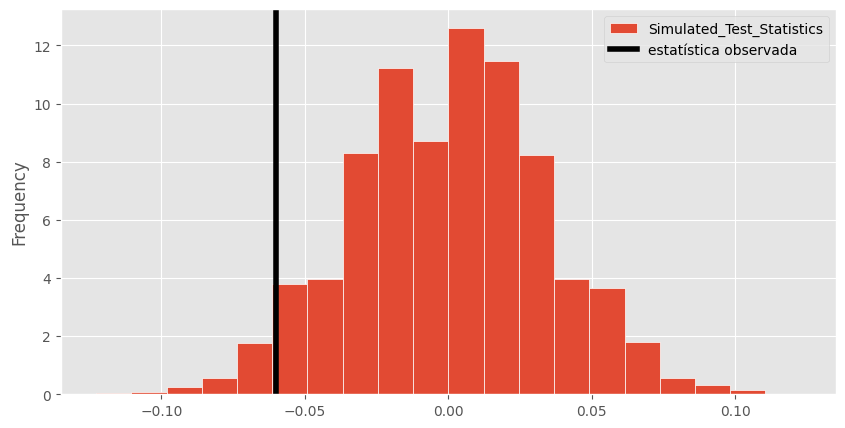

In [345]:
t = bpd.DataFrame().assign(Simulated_Test_Statistics = simulated_test_statistics)
t.plot(kind='hist', density=True, ec='w', bins=20, figsize=(10, 5))
plt.axvline(x=observed_test_statistic, color='black', label='estatística observada', linewidth=4)
plt.legend();

Podemos apresentar um argumento visual sobre se acreditamos ou não que a estatística de teste observada provavelmente ocorrerá sob o valor nulo, ou podemos usar a definição de p-valores para nos ajudar a apresentar um argumento mais formal.

**Questão 2.8.** Atribua `p_value` ao número inteiro correspondente à definição correta do que realmente é um valor p.

1. A chance, sob a hipótese nula, de que a estatística do teste seja igual ao valor observado.
2. A chance, sob a hipótese nula, de que a estatística de teste seja igual ao valor observado ou esteja ainda mais na direção da alternativa.
3. A chance, sob a hipótese alternativa, de que a estatística de teste seja igual ao valor que foi observado ou esteja ainda mais na direção do nulo.
4. O número de vezes, sob a hipótese nula, que a estatística de teste é igual ao valor observado ou está ainda mais na direção da alternativa.

In [346]:
p_value = 2
p_value

2

**Pergunta 2.9.** Usando a definição acima, calcule o valor p para o experimento de Emily.

*Dicas:*
- Valores grandes de nossa estatística de teste fazem você se inclinar para o nulo ou para a alternativa?
- Veja Aula 15 ou [CIT 11.1](https://inferentialthinking.com/chapters/11/1/Assessing_a_Model.html) para exemplos.

In [347]:
(np.count_nonzero(simulated_test_statistics <= observed_test_statistic) / num_repetitions) + (np.count_nonzero(simulated_test_statistics >= 0 - observed_test_statistic) / num_repetitions)emily_p_val = 
emily_p_val

0.0684

Se nosso valor p for menor ou igual a 0,05, isso é a favor de nossa alternativa e rejeitamos a hipótese nula. Caso contrário, não temos provas suficientes contra a nossa hipótese nula. **Observe que isso não significa que apoiamos a hipótese nula e a aceitamos, mas sim que simplesmente não conseguimos rejeitá-la.**

Isso deve ajudá-lo a tirar suas próprias conclusões sobre o experimento de Emily Rosa.

O Toque Terapêutico caiu em desuso após esse experimento, que acabou sendo aceito em uma das principais revistas médicas. Os praticantes de TT reagiram e acusaram Emily e sua família de adulterar os resultados, enquanto alguns alegaram que o mau humor espiritual de Emily em relação ao Toque Terapêutico dificultava a leitura de seu HEF. Seja o que for, a experiência de Emily é um exemplo clássico de como qualquer pessoa, com os recursos certos, pode testar o que quiser!

## 3. Voos atrasados? ✈️

Em outubro de 2022, Spirit Airlines e JetBlue Airlines [anunciaram que estão se unindo](https://www.nytimes.com/2022/10/19/business/spirit-airlines-jetblue-merger.html) para se transformaram em uma única companhia aérea maior. Eles ainda não criaram um nome para a nova companhia aérea resultante da fusão.

Vamos avançar seis meses no futuro e fingir que eles decidiram chamar a nova companhia aérea de Jetspear. Jetspear teve um bom começo e relata que impressionantes 94% de seus voos estão dentro do horário (o que significa que, supostamente, apenas 6% de seus voos estão atrasados). King Triton, o mascote de confiança da UCSD, voou no Jetspear 100 vezes nos últimos seis meses e teve 12 voos atrasados.

Rei Tritão está com raiva e acredita que Jetspear está mentindo. Mas Jetspear está convencido de que eles estão certos.

**Pergunta 3.1.** Você decide investigar a situação executando um teste de hipótese. Quais são as hipóteses nula e alternativa? Escreva ambas as suas respostas na célula abaixo.

Nula: A probabilidade é como a Jetspear relata. Alternativa: A probabilidade não é como a Jetspear relata.

<!-- FIM DA PERGUNTA -->



**Pergunta 3.2.** Atribua `null_probabilities` a uma *matriz* de dois itens, de modo que o primeiro elemento seja a chance de um voo do Jetspear estar dentro do prazo e o segundo elemento seja a chance de um voo do Jetspear estar atrasado, sob os pressupostos da **hipótese nula**.

In [348]:
null_probabilities = [0.06, 0.94]
null_probabilities

[0.06, 0.94]

**Pergunta 3.3.** Usando a matriz definida acima, simule o ato de voar em 100 voos do Jetspear, 10.000 vezes. Crie um array chamado `simulated_num_delayed` contendo o **número de voos atrasados** em cada simulação.

num_flights = 100
num_flight_simulations = 10_000
simulated_num_delayed = 
...
simulated_num_delayed

Execute a célula abaixo para visualizar os resultados da simulação.

In [349]:
num_flights = 100
num_flight_simulations = 10_000
observed_delay = test_statistic(0.06, 12/100)
simulated_num_delayed = simulate_null_hypothesis(num_flight_simulations, null_probabilities, num_flights, 0.06)
simulated_num_delayed

array([ 0.04, -0.04, -0.01, ...,  0.01, -0.05, -0.01])

**Pergunta 3.4.** Use os resultados da simulação para calcular o valor p para este teste de hipótese e atribua sua resposta a `delay_p_val`.

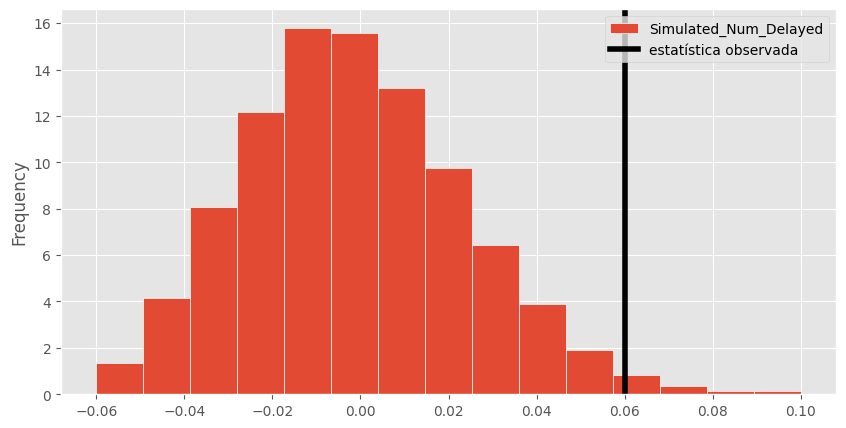

In [350]:
p = bpd.DataFrame().assign(Simulated_Num_Delayed = simulated_num_delayed)
p.plot(kind='hist', density=True, ec='w', bins=15, figsize=(10, 5))
plt.axvline(x=observed_delay, color='black', label='estatística observada', linewidth=4)
plt.legend();

In [352]:
delay_p_val = (np.count_nonzero(simulated_num_delayed >= observed_delay) / num_flight_simulations) + (np.count_nonzero(simulated_num_delayed <= 0 - observed_delay) / num_flight_simulations)
delay_p_val

0.018000000000000002

Você deve ser capaz de dizer, tanto pelo histograma quanto pelo valor p calculado, que a Jetspear parece ter mais voos atrasados ​​do que afirma!

# Linha de chegada

Parabéns! Você concluiu o Laboratório 4.

Para enviar sua tarefa:

1. Selecione `Kernel -> Reiniciar e executar tudo` para garantir que você executou todas as células, incluindo as células de teste.
2. Leia o caderno para ter certeza de que está tudo bem e que todos os testes foram aprovados.
3. Baixe seu notebook usando `Arquivo -> Baixar como -> Notebook (.ipynb)` e, em seguida, carregue seu notebook para o Moodle.